In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load datasets

input_path = '/Users/alexgrigoras/Datasets/m5-forecasting-accuracy/'
export_path = 'datasets/'

sales_data = pd.read_csv(input_path + "sales_train_validation.csv")
calendar = pd.read_csv(input_path + "calendar.csv")
sell_prices = pd.read_csv(input_path + "sell_prices.csv")

In [13]:
# Create sales & demand dataset

df = sales_data.melt(
    id_vars=["id", "item_id", "dept_id", "cat_id", "store_id", "state_id"],
    var_name="day",
    value_name="sales"
)

df = df.merge(calendar[["d", "date", "wm_yr_wk", "event_name_1", "event_type_1", "event_name_2", "event_type_2"]],
                              left_on="day", right_on="d", how="left").drop(columns=["d", "day"])
df = df.merge(sell_prices, on=["store_id", "item_id", "wm_yr_wk"], how="left")

df = df.rename(columns={"date": "timestamp", "sales": "demand", "sell_price": "price"}).set_index("timestamp")

df = df[["item_id", "store_id", "demand", "price", "event_name_1", "event_type_1", "event_name_2", "event_type_2"]]

In [14]:
# Save to CSV

#df.to_csv(export_path + "m5_dataset.csv", index=False)

In [15]:
df

,item_id,store_id,demand,price,event_name_1,event_type_1,event_name_2,event_type_2
timestamp,,,,,,,,
2011-01-29,HOBBIES_1_001,CA_1,0,NaN,NaN,NaN,NaN,NaN
2011-01-29,HOBBIES_1_002,CA_1,0,NaN,NaN,NaN,NaN,NaN
2011-01-29,HOBBIES_1_003,CA_1,0,NaN,NaN,NaN,NaN,NaN
2011-01-29,HOBBIES_1_004,CA_1,0,NaN,NaN,NaN,NaN,NaN
2011-01-29,HOBBIES_1_005,CA_1,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2016-04-24,FOODS_3_823,WI_3,1,2.98,NaN,NaN,NaN,NaN
2016-04-24,FOODS_3_824,WI_3,0,2.48,NaN,NaN,NaN,NaN
2016-04-24,FOODS_3_825,WI_3,0,3.98,NaN,NaN,NaN,NaN


In [16]:
# Display dataset info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 58327370 entries, 2011-01-29 to 2016-04-24
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   item_id       object 
 1   store_id      object 
 2   demand        int64  
 3   price         float64
 4   event_name_1  object 
 5   event_type_1  object 
 6   event_name_2  object 
 7   event_type_2  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.9+ GB
None


In [17]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 item_id                0
store_id               0
demand                 0
price           12299413
event_name_1    53631910
event_type_1    53631910
event_name_2    58205410
event_type_2    58205410
dtype: int64


In [18]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             demand         price
count  5.832737e+07  4.602796e+07
mean   1.126322e+00  4.408089e+00
std    3.873108e+00  3.403657e+00
min    0.000000e+00  1.000000e-02
25%    0.000000e+00  2.180000e+00
50%    0.000000e+00  3.470000e+00
75%    1.000000e+00  5.840000e+00
max    7.630000e+02  1.073200e+02


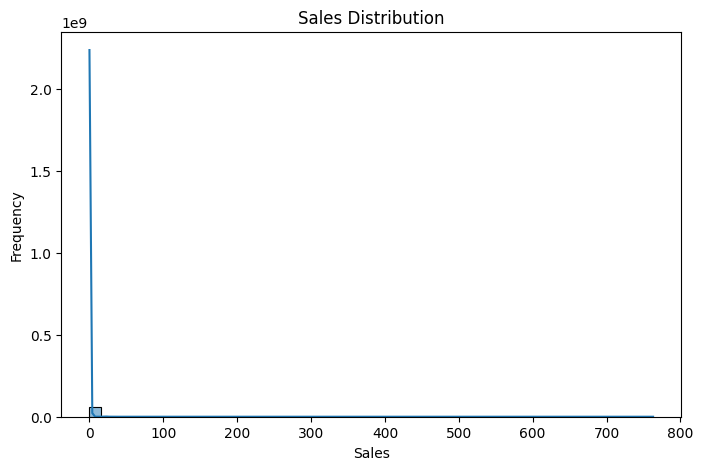

In [34]:
# Sales distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["demand"], bins=50, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

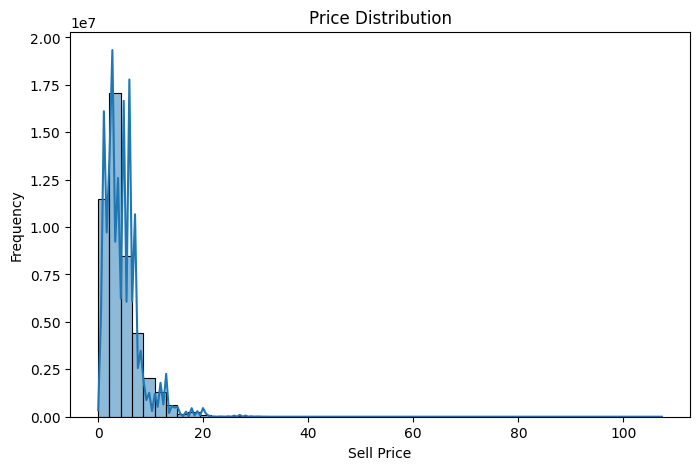

In [35]:
# Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["price"].dropna(), bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Sell Price")
plt.ylabel("Frequency")
plt.show()

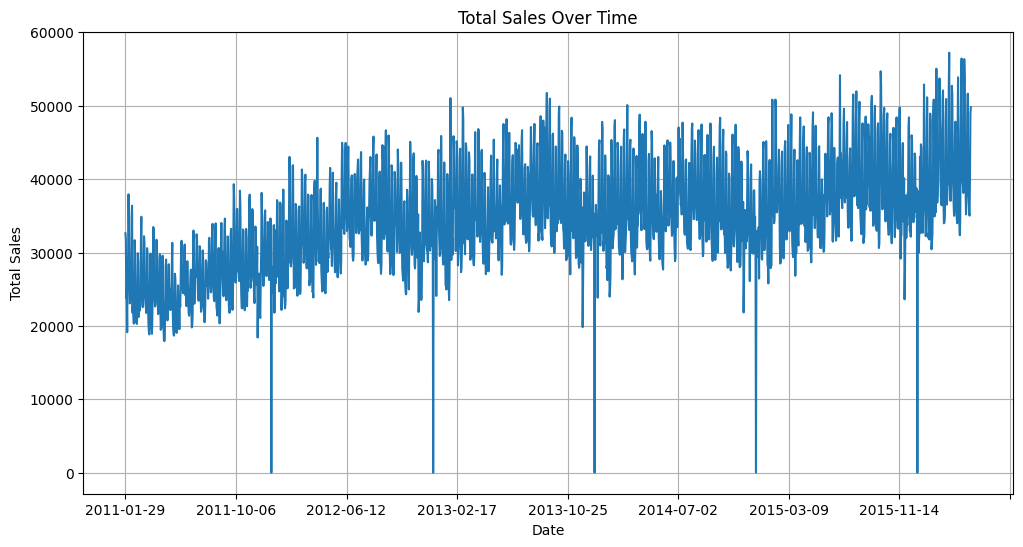

In [36]:
# Sales trends over time (total sales per day)
plt.figure(figsize=(12, 6))
df.groupby(df.index)["demand"].sum().plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

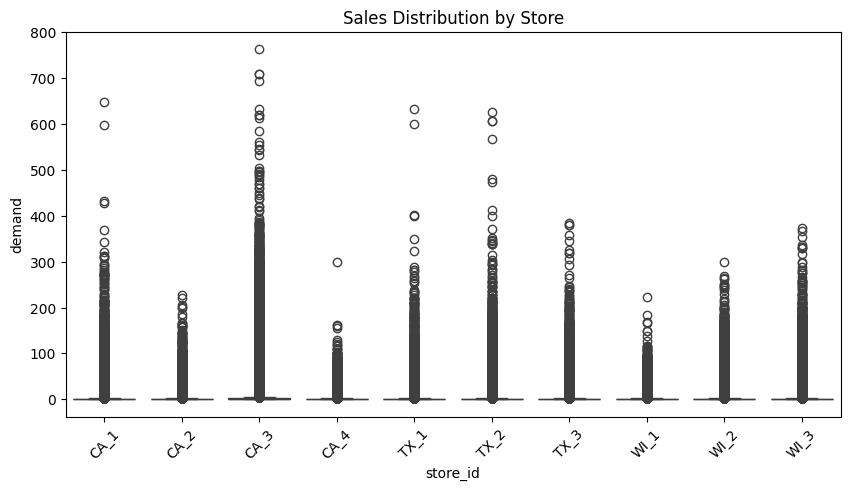

In [37]:
# Sales by store
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="store_id", y="demand")
plt.title("Sales Distribution by Store")
plt.xticks(rotation=45)
plt.show()

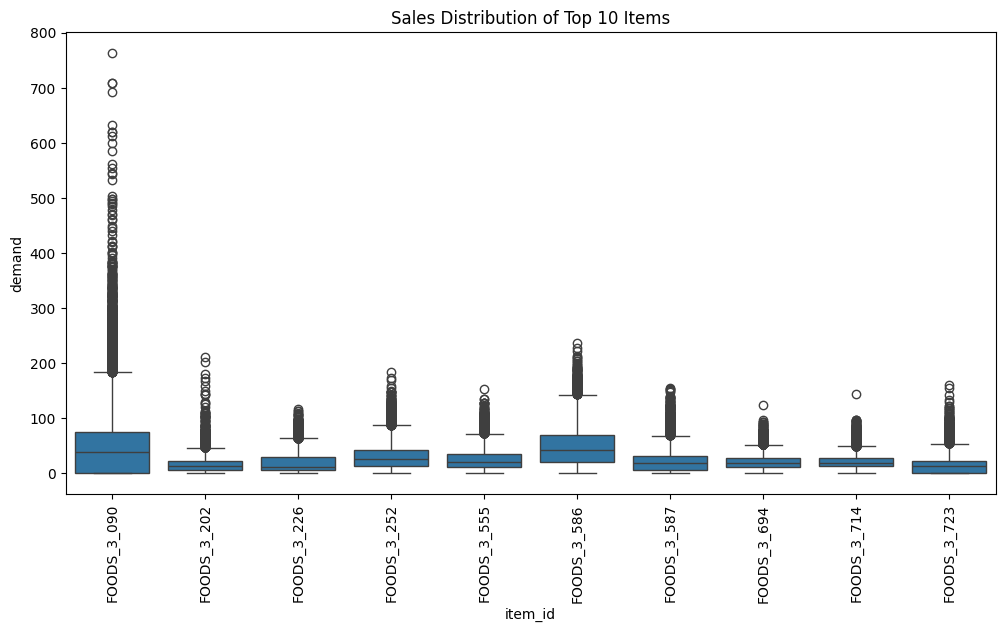

In [38]:
# Sales by item
plt.figure(figsize=(12, 6))
top_items = df.groupby("item_id")["demand"].sum().nlargest(10).index
sns.boxplot(data=df[df["item_id"].isin(top_items)], x="item_id", y="demand")
plt.title("Sales Distribution of Top 10 Items")
plt.xticks(rotation=90)
plt.show()

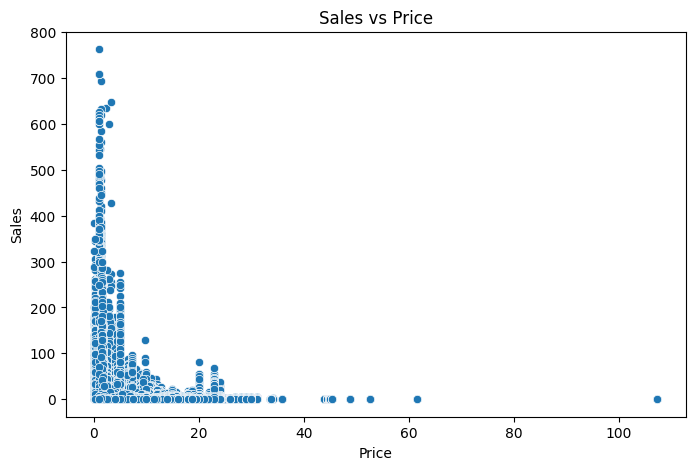

In [46]:
# Sales vs Price scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df[df["price"].notnull()]["price"], y=df[df["price"].notnull()]["demand"])
plt.title("Sales vs Price")
plt.xlabel("Price")
plt.ylabel("Sales")
plt.show()

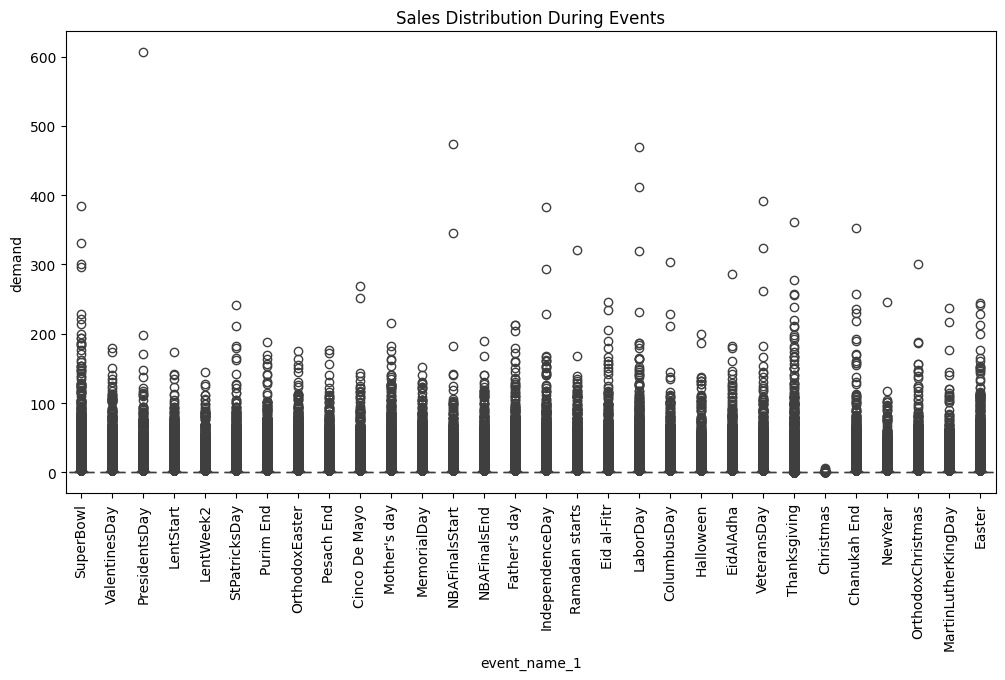

In [47]:
# Sales during events
plt.figure(figsize=(12, 6))
event_sales = df[df["event_name_1"].notnull()]
sns.boxplot(data=event_sales, x="event_name_1", y="demand")
plt.title("Sales Distribution During Events")
plt.xticks(rotation=90)
plt.show()
